# Tarea 1: Homología Persistente

La siguiente actividad te ayudará a fortalecer los conceptos de homología persistente y filtraciones, y las paqueterías:
* `gudhi`
* `ripser`
* `giotto-tda`
* `scikit-tda`
* `tadasets`

La actividad está dividida en dos partes:

1. **Ejercicios de Práctica**: En esta sección se te proporcionarán ejercicios prácticos para que puedas aplicar los conceptos aprendidos en la teoría usando las paqueterías mencionadas.
2. **Caso Práctico:** Aplicar el concepto de homología persistente (diagramas, barcodes, imágenes de persistencia, distancias entre Diagramas) a un conjunto de datos reales. En esta sección se te proporcionará un conjunto de datos y se te pedirá que apliques los conceptos aprendidos para analizarlo y extraer información relevante.

## 1. Ejercicios de Práctica

En la siguiente sección se te proporcionarán ejercicios prácticos para que puedas:

- Construir filtraciones de bases de datos y graficarlas.
- Construir los diagramas de persistencia de bases de datos, interpretarlas.
- Construir otras visualizaciones de los diagramas de persistencia.
- Comparar diagramas de persistencia utilizando distancias Bottleneck y Wasserstein, e interpretarlas.

In [1]:
!pip install tadasets
!pip install ripser
!pip install persim
!pip install gudhi
!pip install -U giotto-tda

In [3]:
pip install --upgrade --force-reinstall numpy pandas scipy ripser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
  Using cached ripser-0.6.12-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
  Using cached persim-0.3.8-py3-none-any.whl.metadata (3.8 kB)
  Using cached hopcroftkarp-1.2.5-py2.py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 26.0 MB/s eta 0:00:00
Using cached ripser-0.6.12-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (841 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [133]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import tadasets # for generating sample data
from ripser import ripser # for computing persistence diagrams
import persim # for comparing persistence diagrams
import gudhi as gd # for computing persistence diagrams
import plotly.graph_objects as go # for plotting persistence diagrams

### Ejercicio 1.1:

Utilizando una nube de puntos construidos con la paquetería `tadasets` por cada tipo en la paquetería  (escoge la dimensión, radio, número de puntos, ruido, etc). Con ayuda de la paquetería `gudhi` construye tres filtraciones (variando el `max_edge_length` y que al menos una filtración corresponda a `max_edge_length`= diámetro del conjunto) de la nube de puntos y grafícalas.

La paquetería `tadasets` contiene los siguientes tipos de objetos:

- torus

- d-sphere

- sphere

- swiss roll

- infinity sign

- eyeglasses

#### 1. Toro

<Axes3D: >

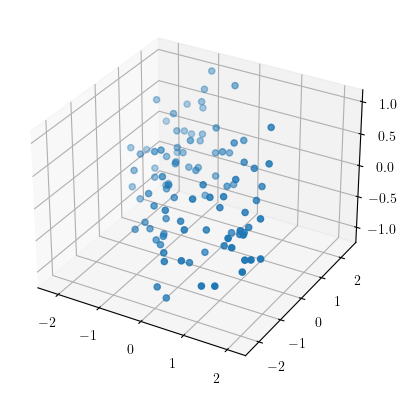

In [158]:
toro= tadasets.torus(100, c=3, a=1, ambient=10, noise=0.4, seed=42)
tadasets.plot3d(toro)

In [159]:
from scipy.spatial.distance import pdist

pairwise_dist = pdist(toro)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 8.8438


El diametro del conjunto es 9.3619, por lo tanto, podemos acotar el parámetro de Rips a 10 y con esto garantizamos que el último complejo simplicial será el que conecta a todos.

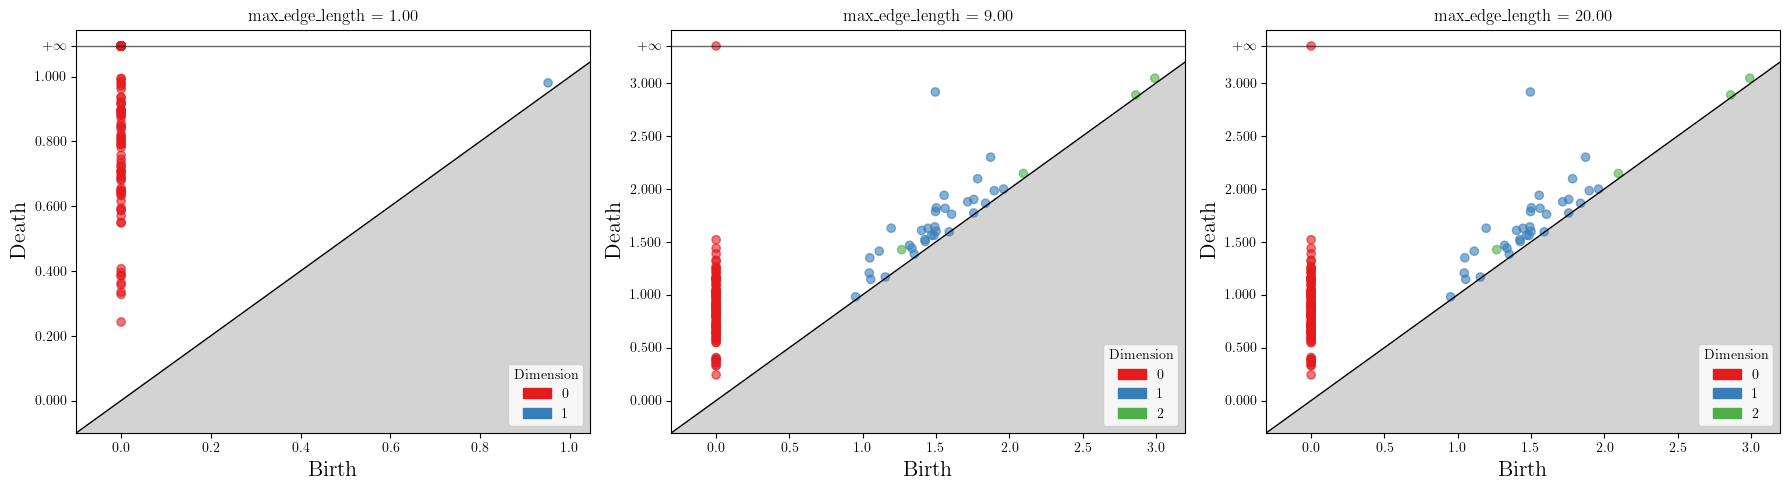

In [160]:
max_edges = [1, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=toro, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

#### 2. d-Esfera

<Axes3D: >

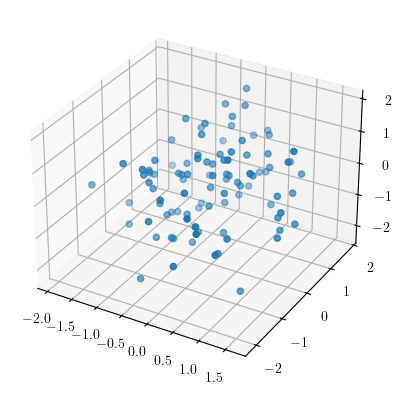

In [161]:
dsphere = tadasets.dsphere(n=100, d=12, r=3.14, ambient=14, noise=0.14)
tadasets.plot3d(dsphere)

In [162]:
from scipy.spatial.distance import pdist

pairwise_dist = pdist(dsphere)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 6.4691


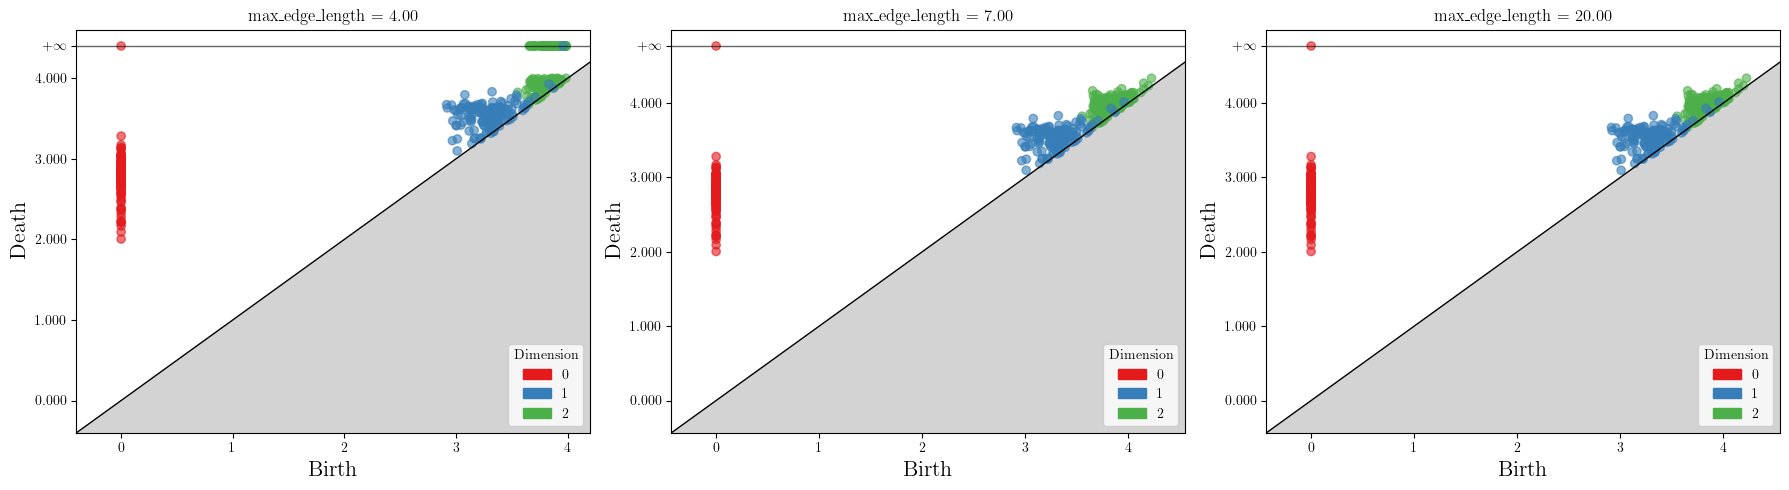

In [163]:
max_edges = [4, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=dsphere, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

El diametro del conjunto es 6.5144, por lo tanto, podemos acotar el parámetro de Rips a 7 y con esto garantizamos que el último complejo simplicial será el que conecta a todos.

#### 3. Esfera

<Axes3D: >

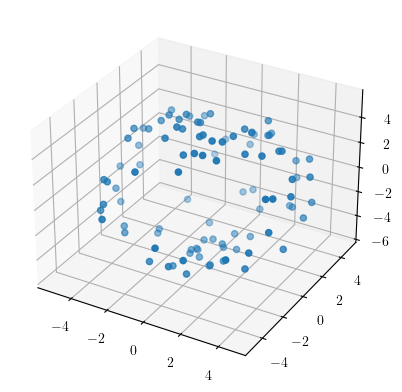

In [164]:
sphere = tadasets.sphere(n= 100, r= 5, noise= 0.24, seed=42)
tadasets.plot3d(sphere)

In [165]:
from scipy.spatial.distance import pdist

pairwise_dist = pdist(sphere)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 10.9506


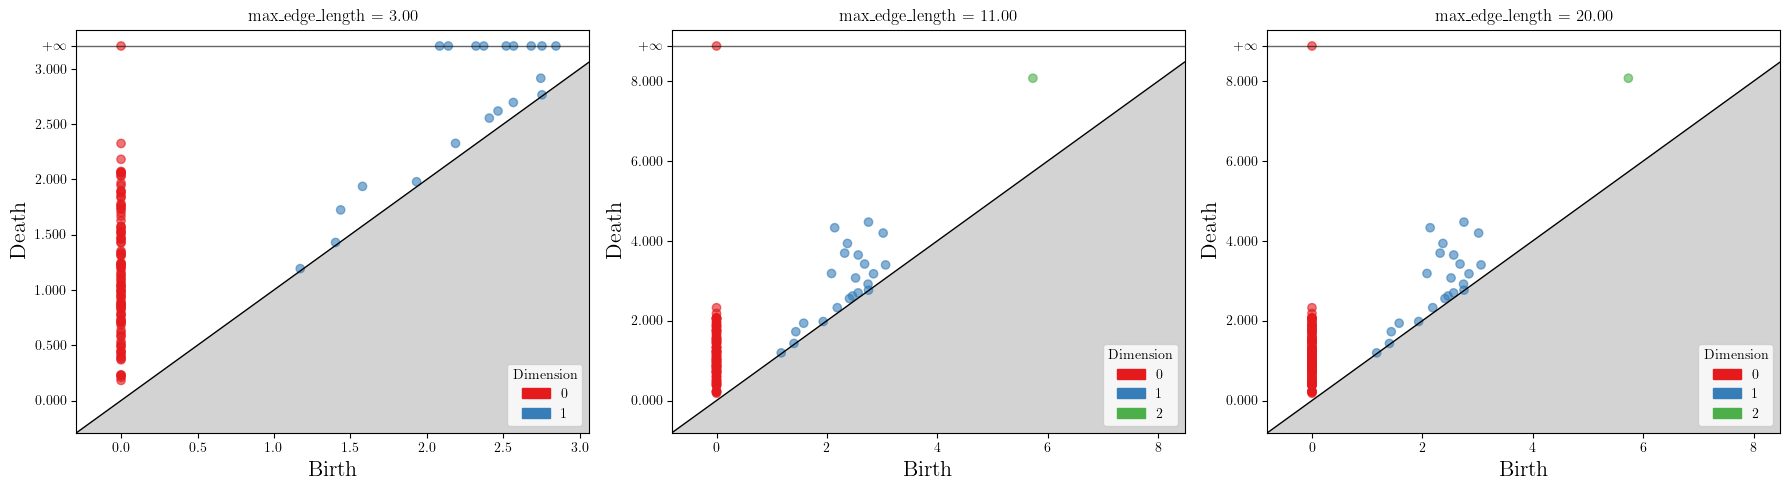

In [166]:
max_edges = [3, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=sphere, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

#### 4. Símbolo de infinito

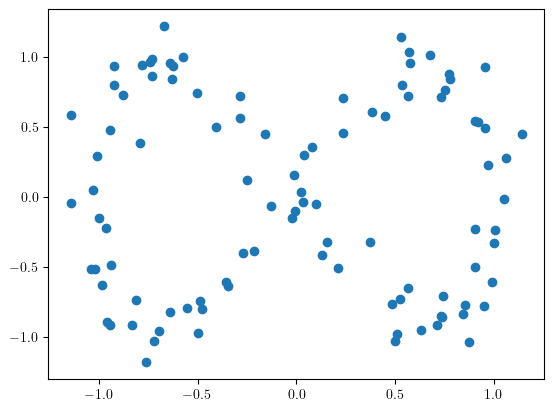

In [167]:
infty_sign = tadasets.infty_sign(n=100, noise=0.1, seed=42)
plt.scatter(infty_sign[:,0], infty_sign[:,1])
plt.show()

In [168]:
from scipy.spatial.distance import pdist

pairwise_dist = pdist(infty_sign)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 2.7308


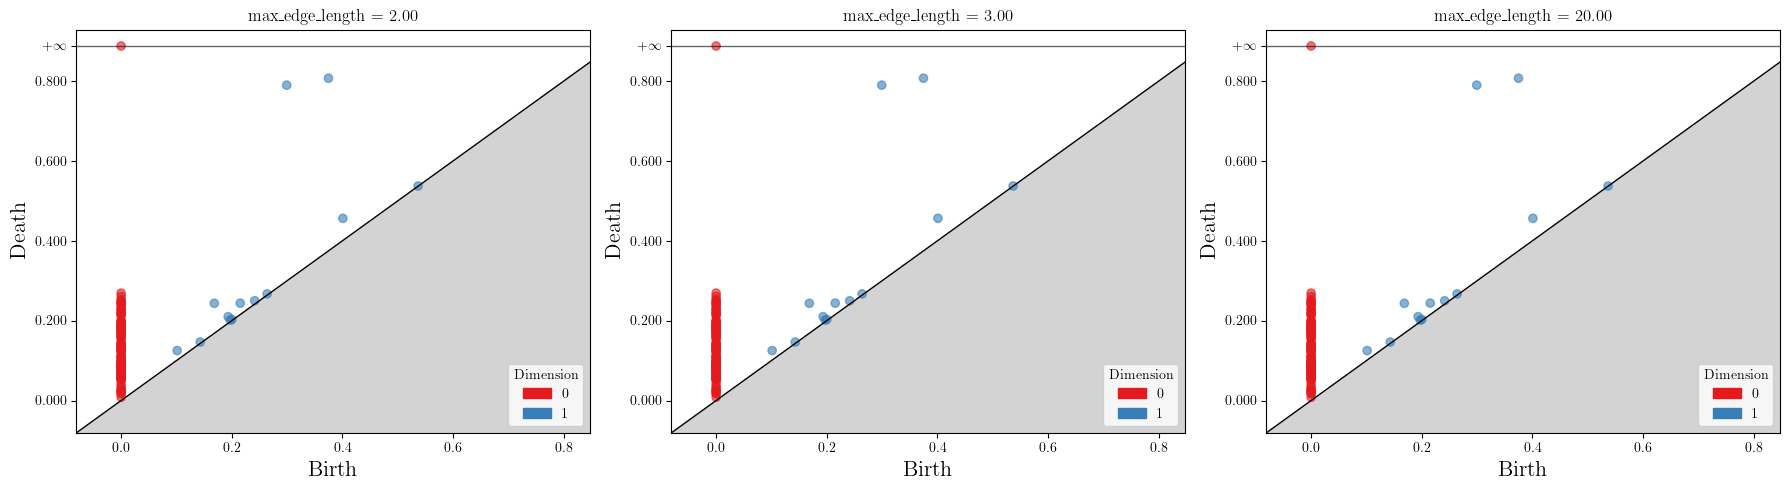

In [169]:
max_edges = [2, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=infty_sign, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

#### 5. Swiss Roll

<Axes3D: >

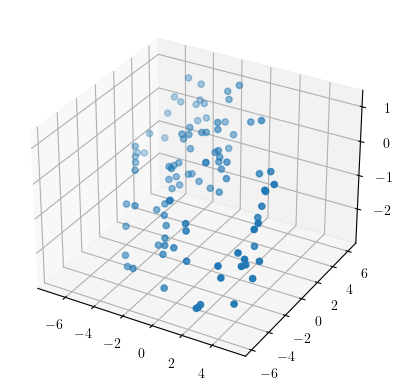

In [170]:
swiss_roll = tadasets.swiss_roll(n=100, r=4, ambient=10, noise=0.4, seed=42)
tadasets.plot3d(swiss_roll)

In [171]:
from scipy.spatial.distance import pdist

pairwise_dist = pdist(swiss_roll)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 25.8611


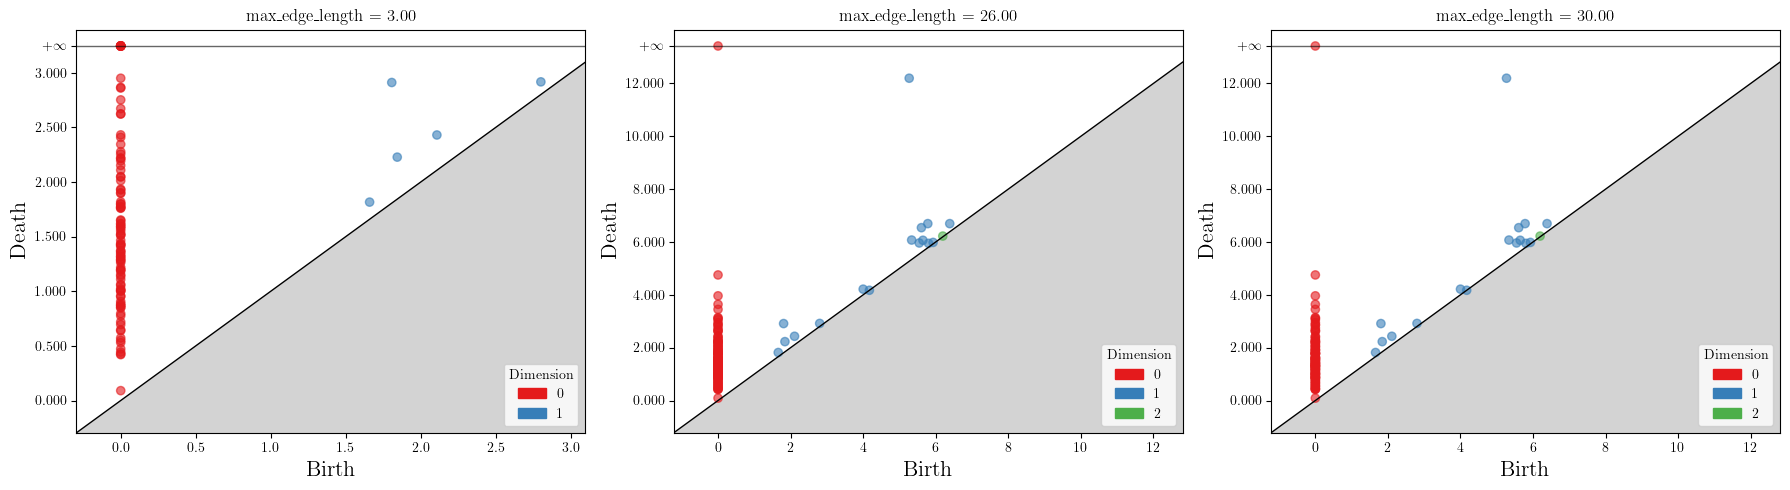

In [172]:
max_edges = [3, np.ceil(diameter),30]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=swiss_roll, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

#### 6. Eye glasses

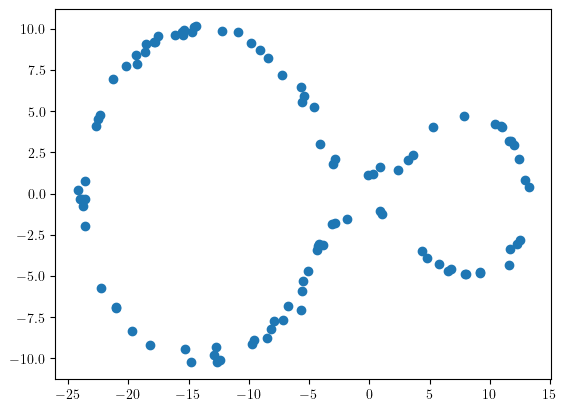

In [149]:
eyeglasses = tadasets.eyeglasses(n=100,r1=10.0, r2=5.0, neck_size=2, noise=0.23, seed=42)
plt.scatter(eyeglasses[:,0], eyeglasses[:,1])
plt.show()

In [150]:
from scipy.spatial.distance import pdist

pairwise_dist = pdist(eyeglasses)
diameter = np.max(pairwise_dist)
print(f"Diámetro del conjunto: {diameter:.4f}")

Diámetro del conjunto: 37.4106


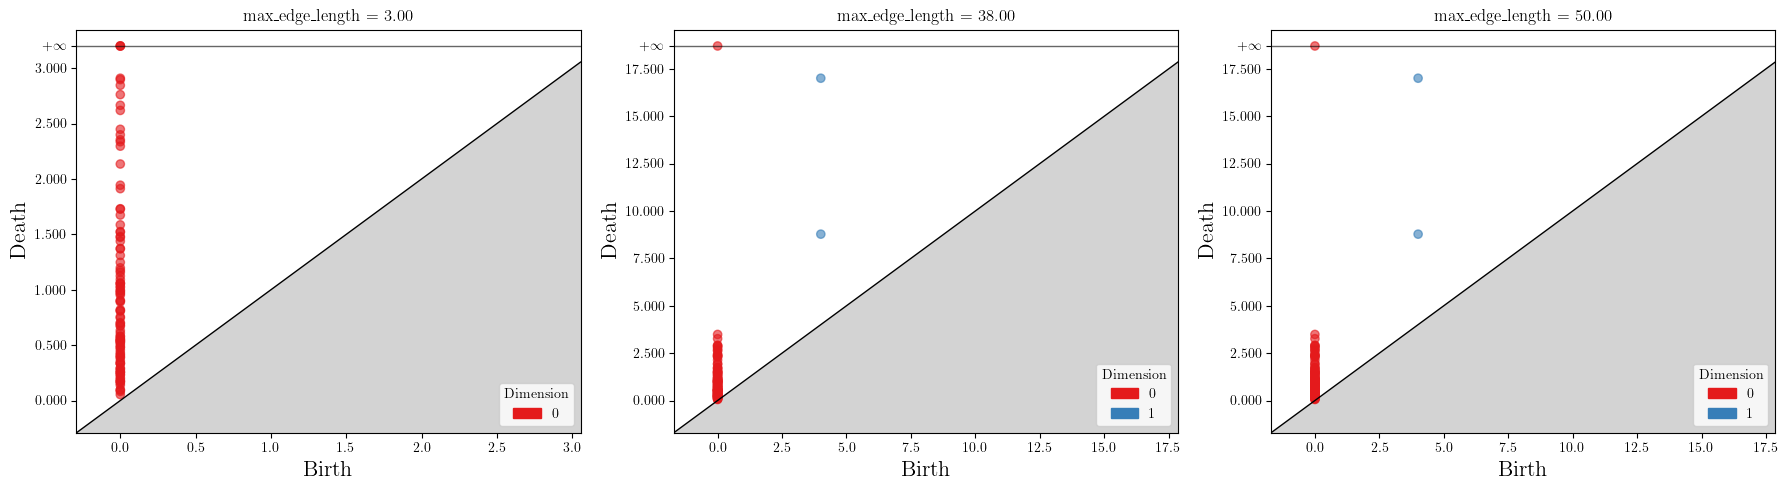

In [151]:
max_edges = [5, np.ceil(diameter),50]  # Tres valores distintos (el último es el diámetro)
diagrams = []

for i, max_edge in enumerate(max_edges):
    rips_complex = gd.RipsComplex(points=eyeglasses, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence()
    diagrams.append((max_edge, diag))

# Paso 4: Graficar los diagramas de persistencia
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (max_edge, diag) in zip(axes, diagrams):
    gd.plot_persistence_diagram(diag, axes=ax)
    ax.set_title(f"max_edge_length = {max_edge:.2f}")

plt.tight_layout()
plt.show()

### Ejercicio 1.2:

Con lo anterior, toma la filtración asociada a `max_edge_length`=diámetro y grafica el diagrama de persistencia.

### Ejercicio 1.3:

Modifica la visualización de los diagramas de persistencia a:
- Barcode
- Density Plot
- Image of Persistence (necesita `giotto-tda`)
- Persistence Landscape (necesita `giotto-tda`)

### Toro

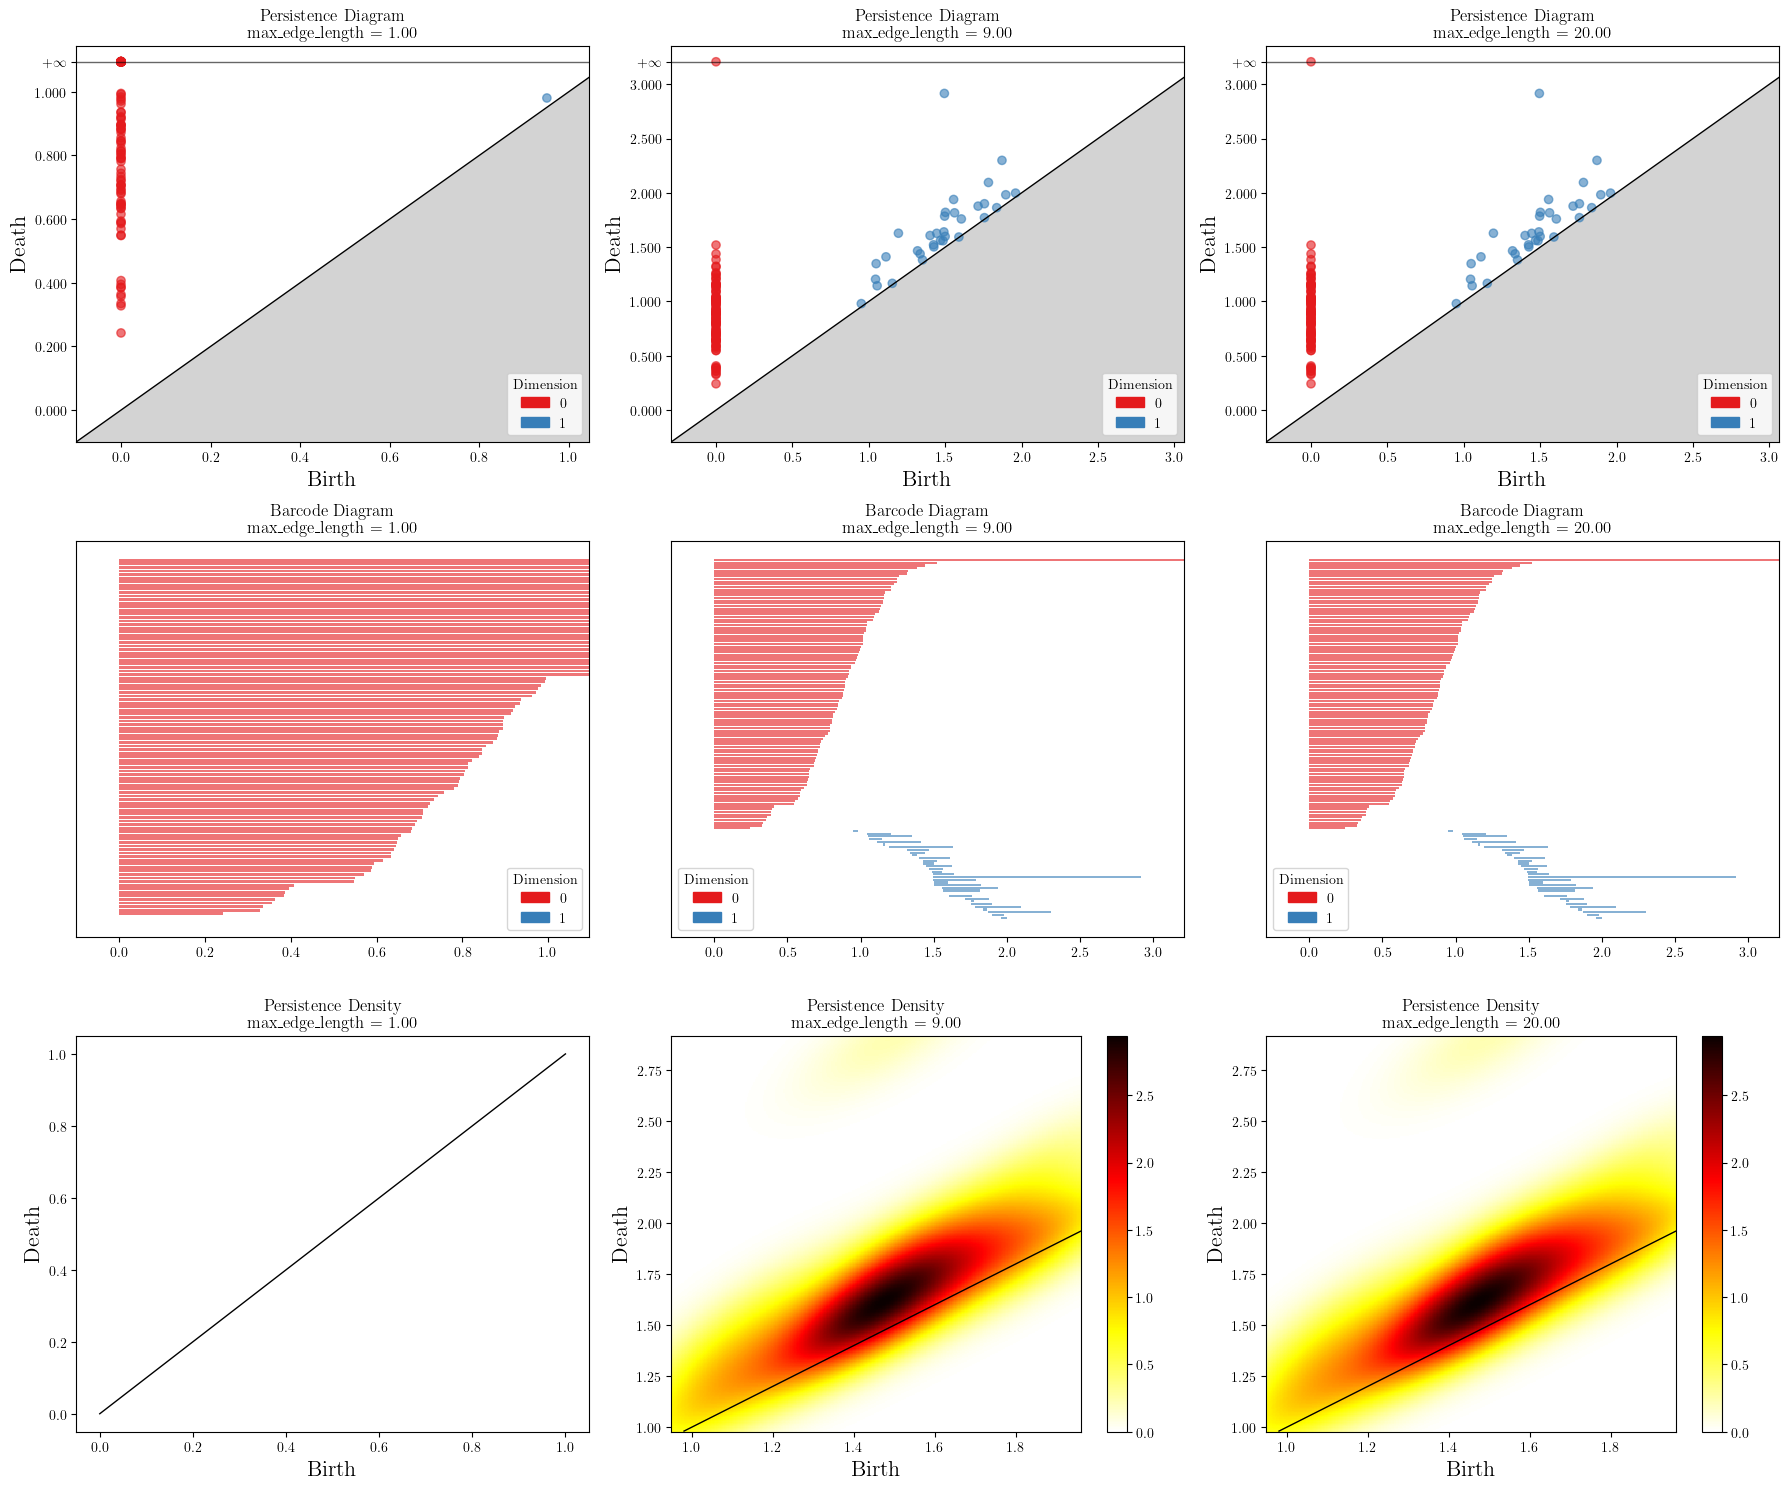

In [182]:
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd
from persim import PersistenceImager


pairwise_dist = pdist(toro)
diameter = np.max(pairwise_dist)

# Assuming 'eyeglasses' (a point cloud) and 'diameter' are already defined
max_edges = [1, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []



# Construir los diagramas con los valores de max_edge
for max_edge in max_edges:
    rips_complex = gd.RipsComplex(points=toro, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(min_persistence=0)
    diagrams.append((max_edge, diag))

# Crear una figura con 3 filas y 3 columnas (para las tres gráficas)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 filas, 3 columnas

# Graficar los diagramas de persistencia (fila superior)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_diagram(diag, axes=axes[0, i])
    axes[0, i].set_title(f"Persistence Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia tipo barcode (fila del medio)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_barcode(diag, axes=axes[1, i])
    axes[1, i].set_title(f"Barcode Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia density (fila inferior)
for i, (max_edge, diag) in enumerate(diagrams):
    rips_complex = gd.RipsComplex(points=toro, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag_infty = simplex_tree.persistence(min_persistence=0)
    gd.plot_persistence_density(diag, axes=axes[2, i], legend=True, max_intervals=1000, dimension=1)
    axes[2, i].set_title(f"Persistence Density\nmax_edge_length = {max_edge:.2f}")

plt.tight_layout()  # Ajustar la disposición de los subgráficos
plt.show()


### d-Esfera

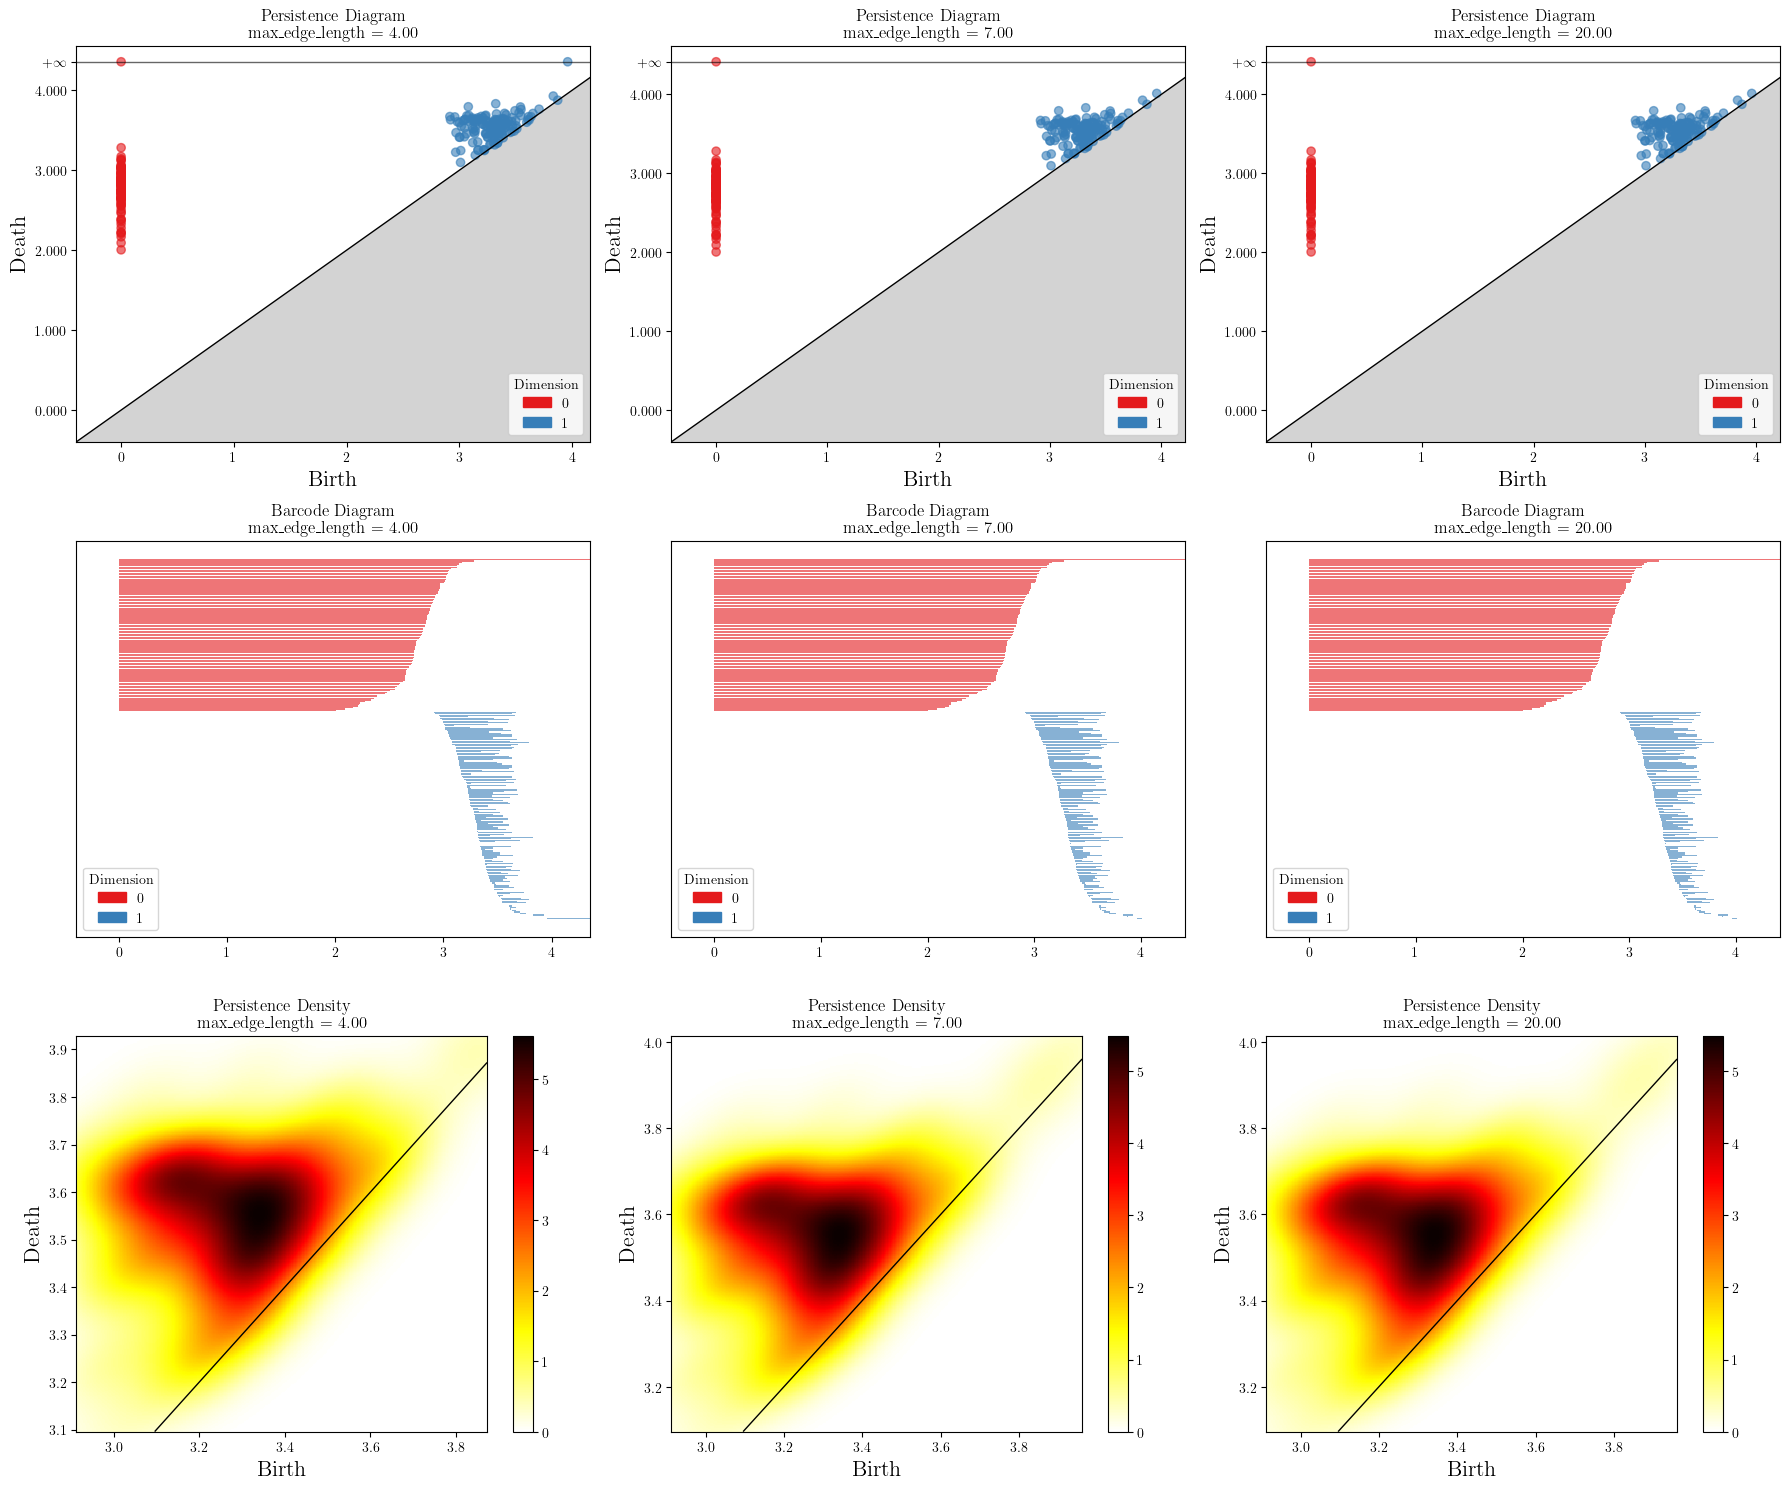

In [176]:
pairwise_dist = pdist(dsphere)
diameter = np.max(pairwise_dist)

max_edges = [4, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []



# Construir los diagramas con los valores de max_edge
for max_edge in max_edges:
    rips_complex = gd.RipsComplex(points=dsphere, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(min_persistence=0)
    diagrams.append((max_edge, diag))

# Crear una figura con 3 filas y 3 columnas (para las tres gráficas)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 filas, 3 columnas

# Graficar los diagramas de persistencia (fila superior)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_diagram(diag, axes=axes[0, i])
    axes[0, i].set_title(f"Persistence Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia tipo barcode (fila del medio)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_barcode(diag, axes=axes[1, i])
    axes[1, i].set_title(f"Barcode Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia density (fila inferior)
for i, (max_edge, diag) in enumerate(diagrams):
    rips_complex = gd.RipsComplex(points=dsphere, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag_infty = simplex_tree.persistence(min_persistence=0)
    gd.plot_persistence_density(diag_infty, axes=axes[2, i], legend=True, max_intervals=1000, dimension=1)
    axes[2, i].set_title(f"Persistence Density\nmax_edge_length = {max_edge:.2f}")

plt.tight_layout()  # Ajustar la disposición de los subgráficos
plt.show()


### Esfera

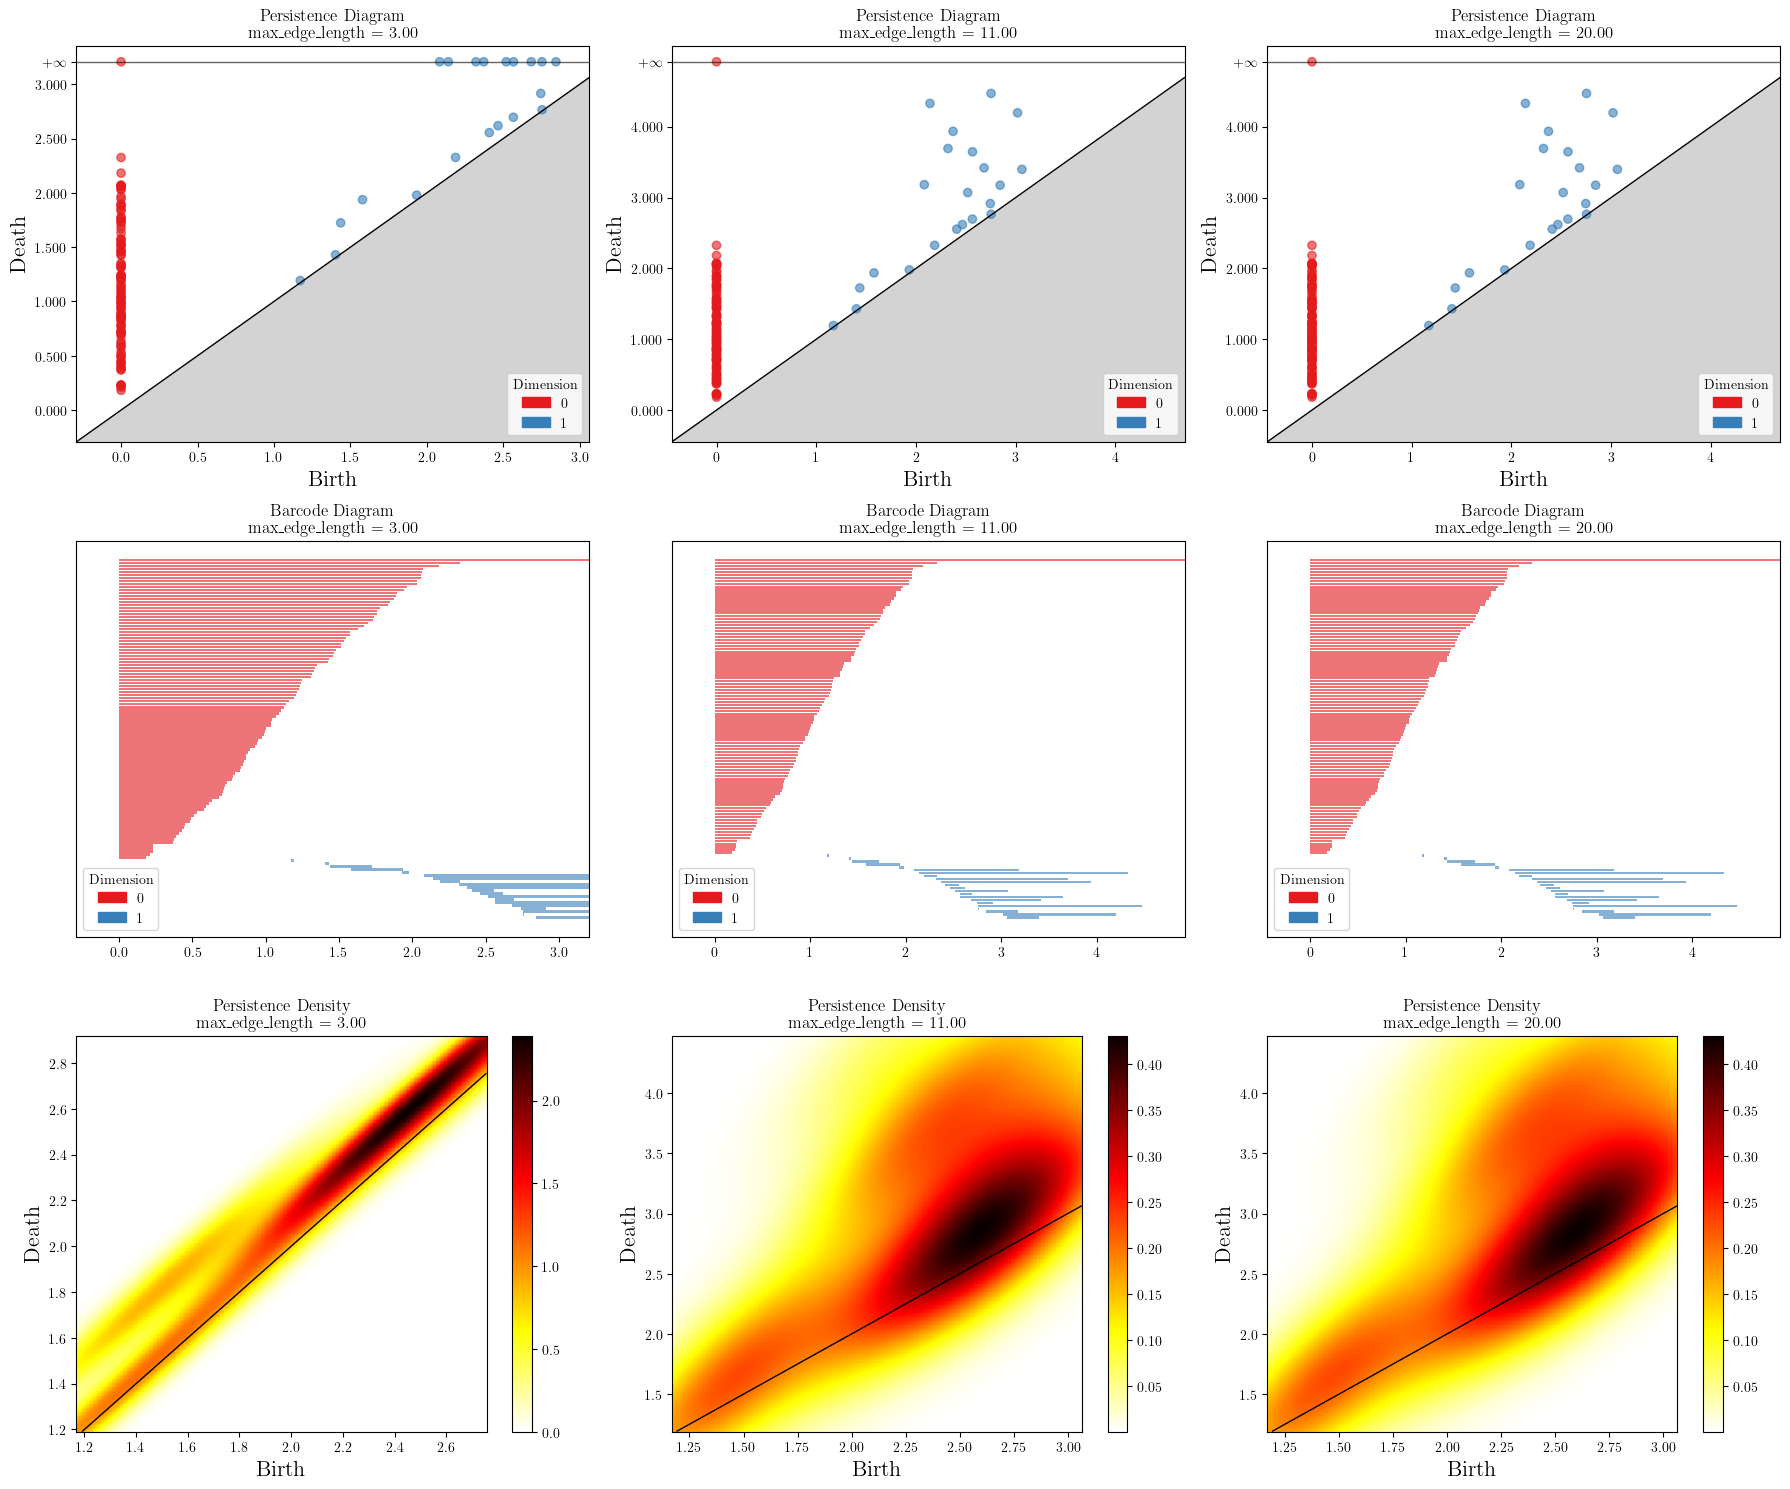

In [177]:
pairwise_dist = pdist(sphere)
diameter = np.max(pairwise_dist)

max_edges = [3, np.ceil(diameter),20]  # Tres valores distintos (el último es el diámetro)
diagrams = []




# Construir los diagramas con los valores de max_edge
for max_edge in max_edges:
    rips_complex = gd.RipsComplex(points=sphere, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(min_persistence=0)
    diagrams.append((max_edge, diag))

# Crear una figura con 3 filas y 3 columnas (para las tres gráficas)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 filas, 3 columnas

# Graficar los diagramas de persistencia (fila superior)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_diagram(diag, axes=axes[0, i])
    axes[0, i].set_title(f"Persistence Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia tipo barcode (fila del medio)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_barcode(diag, axes=axes[1, i])
    axes[1, i].set_title(f"Barcode Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia density (fila inferior)
for i, (max_edge, diag) in enumerate(diagrams):
    rips_complex = gd.RipsComplex(points=sphere, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag_infty = simplex_tree.persistence(min_persistence=0)
    gd.plot_persistence_density(diag_infty, axes=axes[2, i], legend=True, max_intervals=1000, dimension=1)
    axes[2, i].set_title(f"Persistence Density\nmax_edge_length = {max_edge:.2f}")

plt.tight_layout()  # Ajustar la disposición de los subgráficos
plt.show()


### Símbolo de infinito

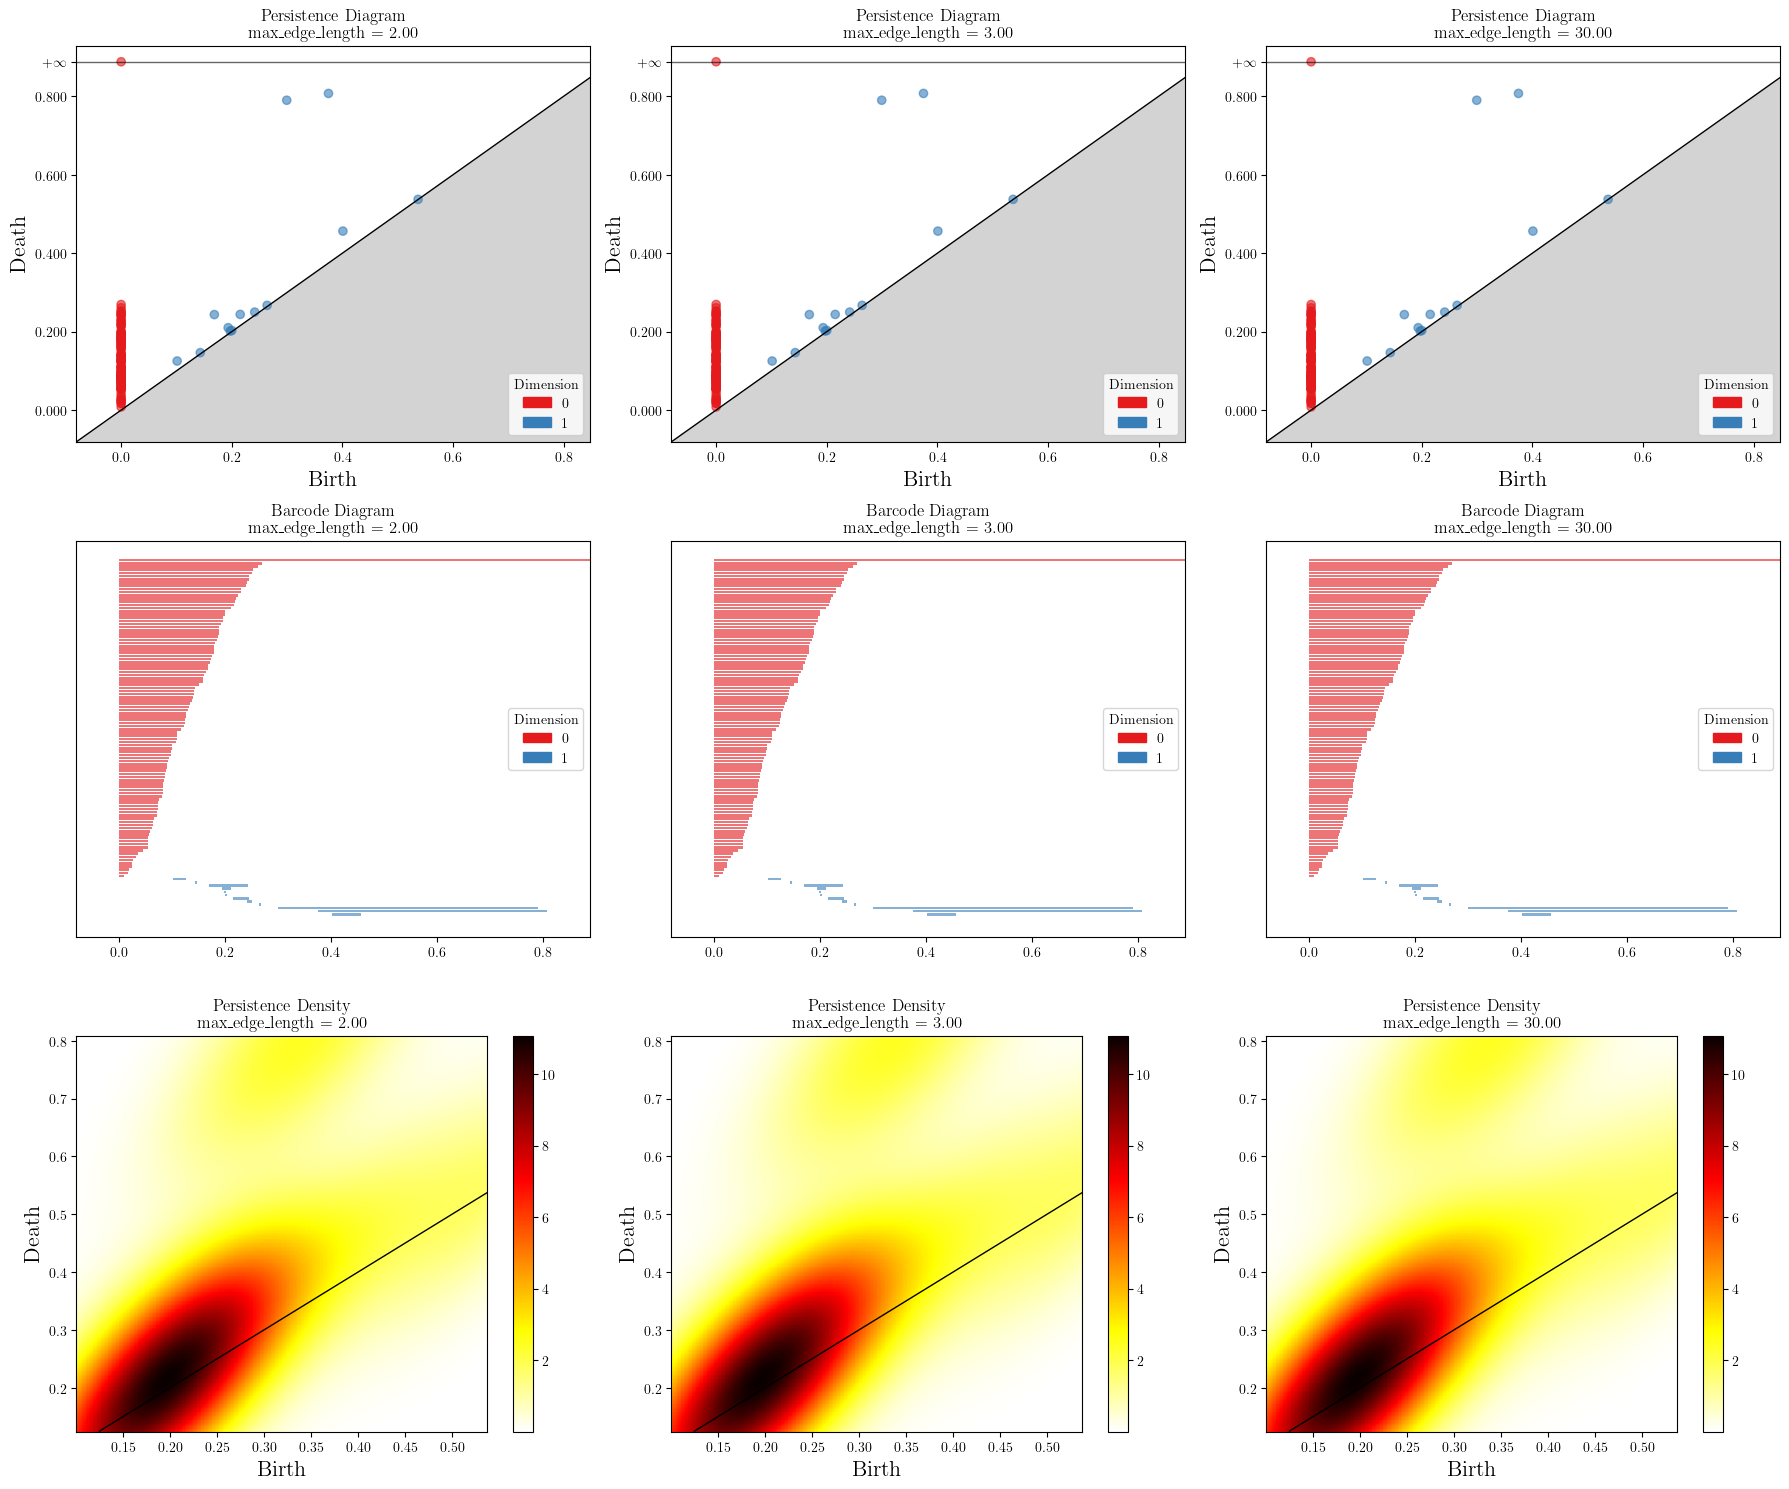

In [181]:
pairwise_dist = pdist(infty_sign)
diameter = np.max(pairwise_dist)

max_edges = [2, np.ceil(diameter),30]  # Tres valores distintos (el último es el diámetro)
diagrams = []


# Construir los diagramas con los valores de max_edge
for max_edge in max_edges:
    rips_complex = gd.RipsComplex(points=infty_sign, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(min_persistence=0)
    diagrams.append((max_edge, diag))

# Crear una figura con 3 filas y 3 columnas (para las tres gráficas)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 filas, 3 columnas

# Graficar los diagramas de persistencia (fila superior)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_diagram(diag, axes=axes[0, i])
    axes[0, i].set_title(f"Persistence Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia tipo barcode (fila del medio)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_barcode(diag, axes=axes[1, i])
    axes[1, i].set_title(f"Barcode Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia density (fila inferior)
for i, (max_edge, diag) in enumerate(diagrams):
    rips_complex = gd.RipsComplex(points=infty_sign, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag_infty = simplex_tree.persistence(min_persistence=0)
    gd.plot_persistence_density(diag_infty, axes=axes[2, i], legend=True, max_intervals=1000, dimension=1)
    axes[2, i].set_title(f"Persistence Density\nmax_edge_length = {max_edge:.2f}")

plt.tight_layout()  # Ajustar la disposición de los subgráficos
plt.show()


### Swiss Roll

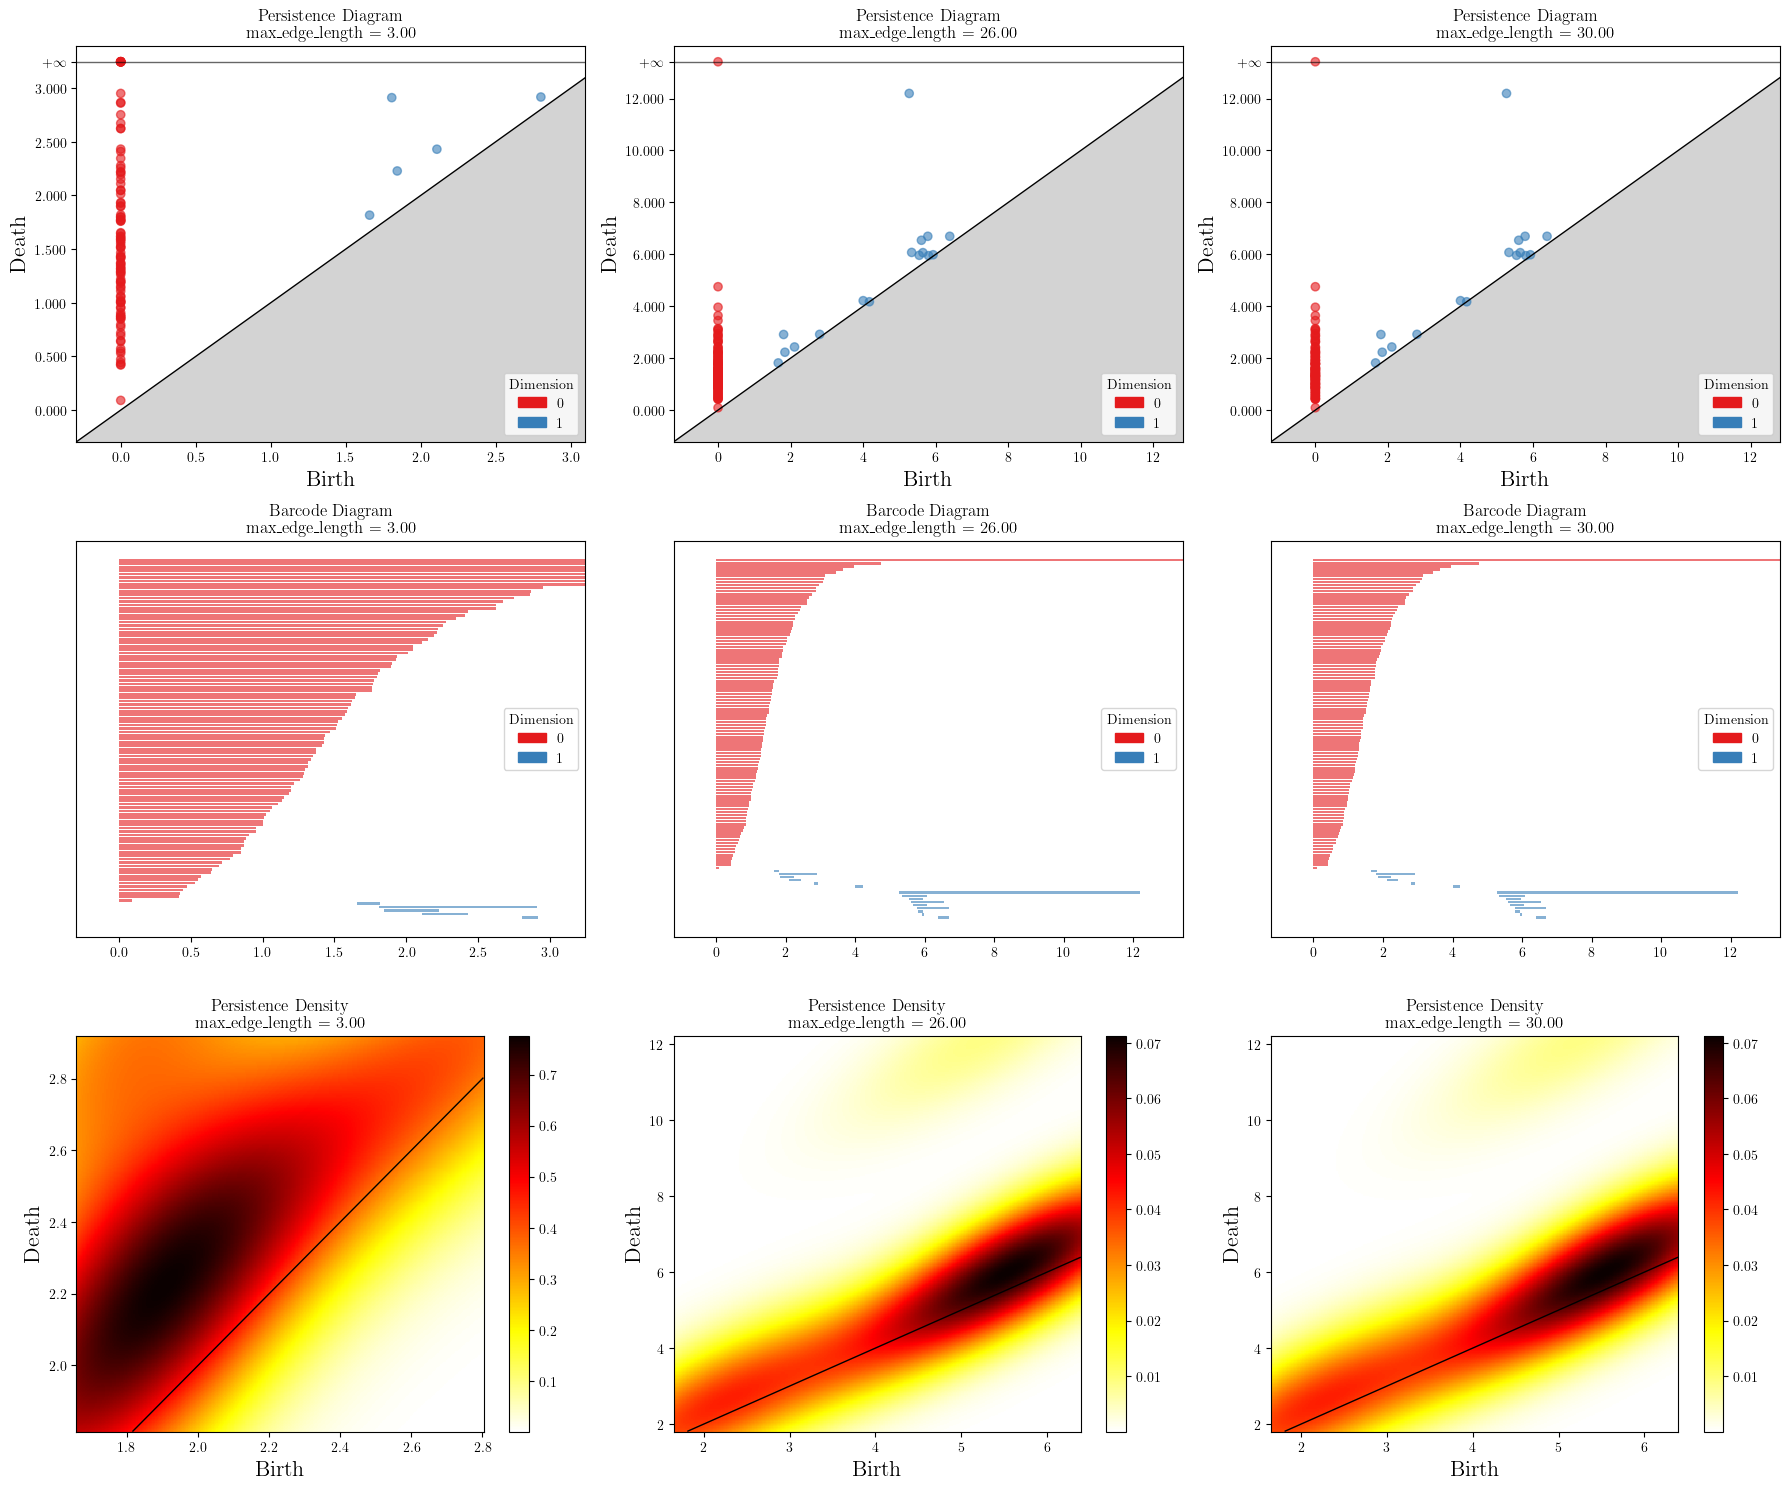

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from gtda.diagrams import PersistenceLandscape
from persim import PersistenceImager
from persim import plot_diagrams


pairwise_dist = pdist(swiss_roll)
diameter = np.max(pairwise_dist)

max_edges = [3, np.ceil(diameter),30]  # Tres valores distintos (el último es el diámetro)
diagrams = []

# Construir los diagramas con los valores de max_edge
for max_edge in max_edges:
    rips_complex = gd.RipsComplex(points=swiss_roll, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(min_persistence=0)
    diagrams.append((max_edge, diag))

# Crear una figura con 3 filas y 3 columnas (para las tres gráficas)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 filas, 3 columnas

# Graficar los diagramas de persistencia (fila superior)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_diagram(diag, axes=axes[0, i])
    axes[0, i].set_title(f"Persistence Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia tipo barcode (fila del medio)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_barcode(diag, axes=axes[1, i])
    axes[1, i].set_title(f"Barcode Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia density (fila inferior)
for i, (max_edge, diag) in enumerate(diagrams):
    rips_complex = gd.RipsComplex(points=swiss_roll, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag_infty = simplex_tree.persistence(min_persistence=0)
    gd.plot_persistence_density(diag_infty, axes=axes[2, i], legend=True, max_intervals=1000, dimension=1)
    axes[2, i].set_title(f"Persistence Density\nmax_edge_length = {max_edge:.2f}")

plt.tight_layout()  # Ajustar la disposición de los subgráficos
plt.show()



### Eye glasses

In [317]:
from gudhi import RipsComplex
from persim import PersistenceImager

# Step 1: Get diagrams from Gudhi
simplex_tree = RipsComplex(points=eyeglasses, max_edge_length=10).create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence()

# Suppose diag is your Gudhi diagram:
# [(dim, (birth, death)), ...]

diag

# Convert to NumPy array and wrap in a list (PersistenceImager expects a list of diagrams)
pdgms = diag
# Now it is safe to use:
pimgr = PersistenceImager(pixel_size=0.5)
pimgr.fit(pdgms, skew=True)
pimgs = pimgr.transform(pdgms, skew=True)

pimgr.plot_image(pimgs[0])


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (102, 2) + inhomogeneous part.

In [298]:
diag_infty
nested_tuples = [bd for _, bd in diag_infty]
nested_tuples

[(4.002770134273286, 17.004533148113254),
 (4.003627664854532, 8.777417943792882),
 (0.0, inf),
 (0.0, 3.485847262440152),
 (0.0, 3.261878553236988),
 (0.0, 2.9091455901534697),
 (0.0, 2.896477313208865),
 (0.0, 2.8451448706767946),
 (0.0, 2.7611877832813914),
 (0.0, 2.6648431360280407),
 (0.0, 2.6183479914753867),
 (0.0, 2.4479866643015873),
 (0.0, 2.398288552380281),
 (0.0, 2.353553440341302),
 (0.0, 2.335582440344473),
 (0.0, 2.295782120018168),
 (0.0, 2.1347659233883314),
 (0.0, 1.9434867703364154),
 (0.0, 1.9123719458519246),
 (0.0, 1.7307720069580332),
 (0.0, 1.727684339711551),
 (0.0, 1.6738935861567015),
 (0.0, 1.5857909278618654),
 (0.0, 1.524205269266098),
 (0.0, 1.5206054593599787),
 (0.0, 1.4800891434071715),
 (0.0, 1.4726000065476739),
 (0.0, 1.437948316515254),
 (0.0, 1.37062115625582),
 (0.0, 1.3703153806250274),
 (0.0, 1.3099575384867164),
 (0.0, 1.2472145115245281),
 (0.0, 1.1977500190768673),
 (0.0, 1.1753026158423598),
 (0.0, 1.157883950083678),
 (0.0, 1.124212447986

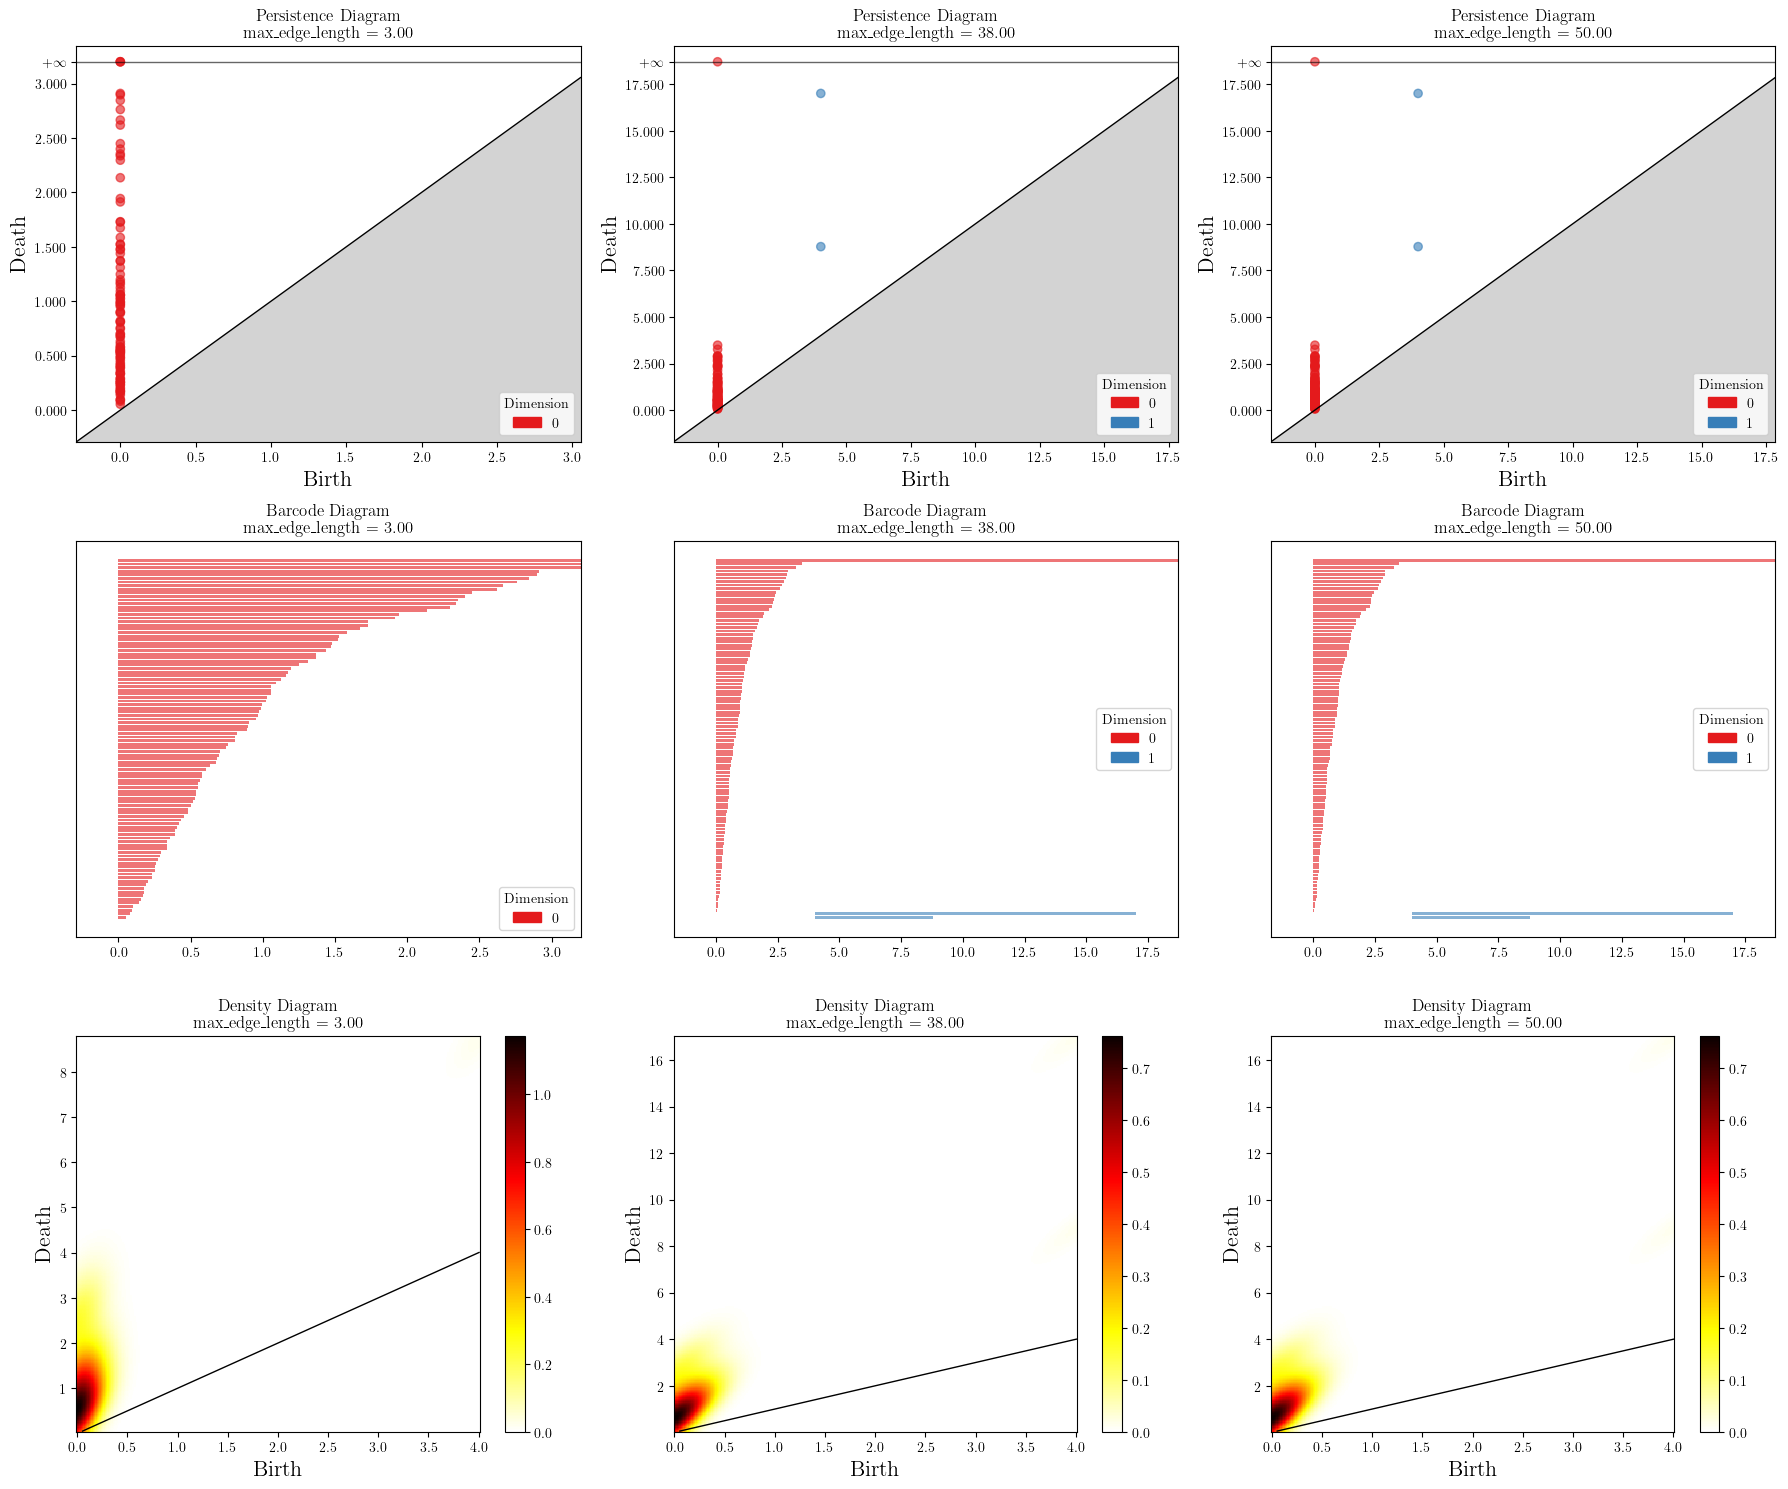

In [282]:
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd
from persim import PersistenceImager

pairwise_dist = pdist(eyeglasses)
diameter = np.max(pairwise_dist)

# Assuming 'eyeglasses' (a point cloud) and 'diameter' are already defined
max_edges = [3, np.ceil(diameter), 50]  # Tres valores distintos (el último es el diámetro)
diagrams = []

# Construir los diagramas con los valores de max_edge
for max_edge in max_edges:
    rips_complex = gd.RipsComplex(points=eyeglasses, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(min_persistence=0)
    diagrams.append((max_edge, diag))

# Crear una figura con 3 filas y 3 columnas (para las tres gráficas)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 filas, 3 columnas

# Graficar los diagramas de persistencia (fila superior)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_diagram(diag, axes=axes[0, i])
    axes[0, i].set_title(f"Persistence Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia tipo barcode (fila del medio)
for i, (max_edge, diag) in enumerate(diagrams):
    gd.plot_persistence_barcode(diag, axes=axes[1, i])
    axes[1, i].set_title(f"Barcode Diagram\nmax_edge_length = {max_edge:.2f}")

# Graficar los diagramas de persistencia density (fila inferior)
rips_complex = gd.RipsComplex(points=eyeglasses, max_edge_length=10)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag_infty = simplex_tree.persistence(min_persistence=0)
gd.plot_persistence_density(diag_infty,axes = axes[2,0],legend = True,max_intervals=1000)
axes[2,0].set_title(f"Density Diagram\nmax_edge_length = {max_edges[0]:.2f}")

rips_complex = gd.RipsComplex(points=eyeglasses, max_edge_length=max_edges[1])
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag_infty = simplex_tree.persistence(min_persistence=0)
gd.plot_persistence_density(diag_infty,axes = axes[2,1],legend = True,max_intervals=1000)
axes[2,1].set_title(f"Density Diagram\nmax_edge_length = {max_edges[1]:.2f}")

rips_complex = gd.RipsComplex(points=eyeglasses, max_edge_length=max_edges[2])
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag_infty = simplex_tree.persistence(min_persistence=0)
gd.plot_persistence_density(diag_infty,axes = axes[2,2],legend = True,max_intervals=1000)
axes[2,2].set_title(f"Density Diagram\nmax_edge_length = {max_edges[2]:.2f}")

plt.tight_layout()  # Ajustar la disposición de los subgráficos
plt.show()


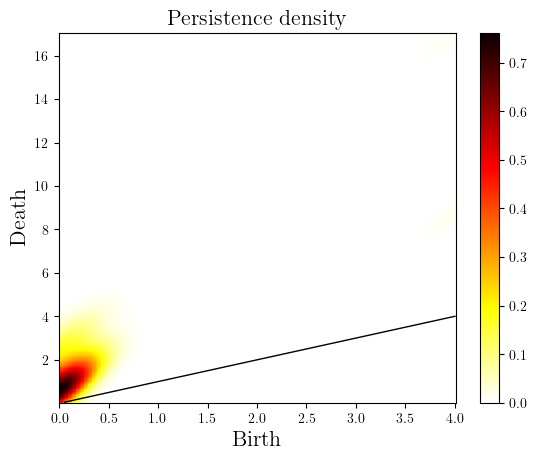

[(3,
  [(0, (0.0, inf)),
   (0, (0.0, inf)),
   (0, (0.0, inf)),
   (0, (0.0, 2.9091455901534697)),
   (0, (0.0, 2.896477313208865)),
   (0, (0.0, 2.8451448706767946)),
   (0, (0.0, 2.7611877832813914)),
   (0, (0.0, 2.6648431360280407)),
   (0, (0.0, 2.6183479914753867)),
   (0, (0.0, 2.4479866643015873)),
   (0, (0.0, 2.398288552380281)),
   (0, (0.0, 2.353553440341302)),
   (0, (0.0, 2.335582440344473)),
   (0, (0.0, 2.295782120018168)),
   (0, (0.0, 2.1347659233883314)),
   (0, (0.0, 1.9434867703364154)),
   (0, (0.0, 1.9123719458519246)),
   (0, (0.0, 1.7307720069580332)),
   (0, (0.0, 1.727684339711551)),
   (0, (0.0, 1.6738935861567015)),
   (0, (0.0, 1.5857909278618654)),
   (0, (0.0, 1.524205269266098)),
   (0, (0.0, 1.5206054593599787)),
   (0, (0.0, 1.4800891434071715)),
   (0, (0.0, 1.4726000065476739)),
   (0, (0.0, 1.437948316515254)),
   (0, (0.0, 1.37062115625582)),
   (0, (0.0, 1.3703153806250274)),
   (0, (0.0, 1.3099575384867164)),
   (0, (0.0, 1.2472145115245281)),


In [223]:
import matplotlib.pyplot as plt
import gudhi as gd
pairwise_dist = pdist(eyeglasses)
diameter = np.max(pairwise_dist)

# Assuming 'eyeglasses' (a point cloud) and 'diameter' are already defined
max_edges = [3, np.ceil(diameter), 50]  # Tres valores distintos (el último es el diámetro)
diagrams = []
token = 0
diag = 0
# Construir los diagramas con los valores de max_edge
for max_edge in max_edges:
    rips_complex = gd.RipsComplex(points=eyeglasses, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence(min_persistence=0)
    diagrams.append((max_edge, diag))
    token = diag
    
gd.plot_persistence_density(diag,legend = True, max_intervals = 1000)


# Assuming 'diag' is your persistence diagram
plt.show()
diagrams


### Ejercicio 1.4:

Selecciona dos tipos de nubes de puntos y construye sus diagramas de persistencia para dos filtraciones diferentes (parametro `max_edge_length`). Compara los diagramas de persistencia utilizando las distancias Bottleneck y Wasserstein.

Una vez comparado, ¿qué pasa si modificamos el parámetro noise en la generación de los datos? Para esto, utiliza un mismo tipo de nube de puntos y varía el parámetro `noise` en la función `tadasets.make_*`. Compara los diagramas de persistencia utilizando las distancias Bottleneck y Wasserstein. ¿Qué observas? ¿Qué tipo de ruido afecta más a la homología persistente? ¿Por qué?

## 2. Caso Práctico:


### Ejercicio 2.1
Con las siguientes bases de datos, aplica los conceptos de homología persistente (diagramas, barcodes, imágenes de persistencia, distancias entre Diagramas) para inferir su forma. Una vez hecho tu análisis, proporciona cuales son las características que observaste en cada una de las bases de datos.



### Ejercicio 2.2: Caídas en la Bolsa de Valores

Utilizaremos la homología persistente y la distancia de Wassertein para determinar años en los que la bolsa de valores tuvo un comportamiento atípico (caída).

In [ ]:
import numpy as np
import yfinance as yf
from ripser import ripser
from persim import plot_diagrams, wasserstein
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Obtenemos los datos, que pertenecen a una serie de tiempo, y las convertimos en una nube de puntos utilizando un encaje.

In [ ]:
def fetch_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)['Adj Close']
    log_returns = np.log(data[1:].values / data[:-1].values)  # Calculate log-returns
    return log_returns, data.index[1:]

In [ ]:
def embed_time_series(data, delay, dim):
    n_points = len(data) - (dim - 1) * delay
    if n_points <= 0:
        raise ValueError("Embedding parameters (delay, dim) result in insufficient points.")
    embedded = np.zeros((n_points, dim))  # Initialize an empty array with the correct dimensions
    for i in range(dim):
        # Flatten data before assigning to embedded[:, i]
        embedded[:, i] = data[i * delay:i * delay + n_points].flatten()
    return embedded

Crea una función que calcule los diagramas de persistencia dado un conjunto de datos (dataframe o numpy) variable. Puedes ayudarte de las paqueterías `ripser`. La función debe tener:

Inputs:
- `data`: dataframe o numpy array con los datos a analizar

Outputs:
- `diagrams`: lista de diagramas de persistencia



Crea una función que calcule la distancia de Wasserstein entre dos diagramas de persistencia asociados a ventanas de encaje distinto. La función debe tener:

Inputs:
- `data`: dataframe o numpy array con los datos a analizar.
- `window_size`: tamaño de la ventana de encaje.
- `delay`: espaciamiento entre observaciones para el encaje.
- `dim`: dimensión en la que se va a encajar.

Output:
- `distance`: distancia de Wasserstein entre los diagramas de persistencia.


In [ ]:
def visualize_embedding_3d(embedded_data, delay, title="3D Time Delay Embedding"):
    """
    Visualize a 3D time delay embedding.

    Parameters:
        embedded_data (np.array): The embedded data with shape (n_points, 3).
        delay (int): The time delay used for the embedding.
        title (str): Title of the plot.
    """
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the embedded data
    ax.plot(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2], 'b-', linewidth=0.5, label='Embedding Curve')
    ax.scatter(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2], c='r', s=10, label='Data Points')

    # Add labels and title
    ax.set_title(title)
    ax.set_xlabel("x(t)")
    ax.set_ylabel(f"x(t + {delay})")
    ax.set_zlabel(f"x(t + {2 * delay})")

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

In [ ]:
def visualize_results(log_returns, dates, wasserstein_distances):
    # Plot time series
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(dates, log_returns, label="Log Returns", color="blue")
    plt.title("Time Series (Log Returns)")
    plt.xlabel("Date")
    plt.ylabel("Log Returns")
    plt.legend()
    plt.grid()

    # Plot Wasserstein distances
    plt.subplot(2, 1, 2)
    plt.plot(dates[:len(wasserstein_distances)], wasserstein_distances, label="Wasserstein Distance", color="orange")
    plt.title("Wasserstein Distance Evolution")
    plt.xlabel("Date")
    plt.ylabel("Wasserstein Distance")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

Utiliza las funciones anteriores para visualizar el encaje de los datos y la distancia de Wasserstein entre los diagramas de persistencia. Puedes graficar la distancia de Wasserstein en función del tiempo para observar si hay caídas en la bolsa de valores.

Utiliza los siguientes parámetros para tu análisis:

```python
ticker = "AAPL"  # Example stock ticker (Apple Inc.)
start_date = "2015-01-01"
end_date = "2022-01-01"
window_size = 100  # Number of data points in each sliding window
delay = 2
dim = 3
```

Prueba con otro ticker de tu elección y determina si hay caídas en la bolsa de valores.